In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [3]:
X, y = make_moons(n_samples=2000,noise=0.2, random_state=42)

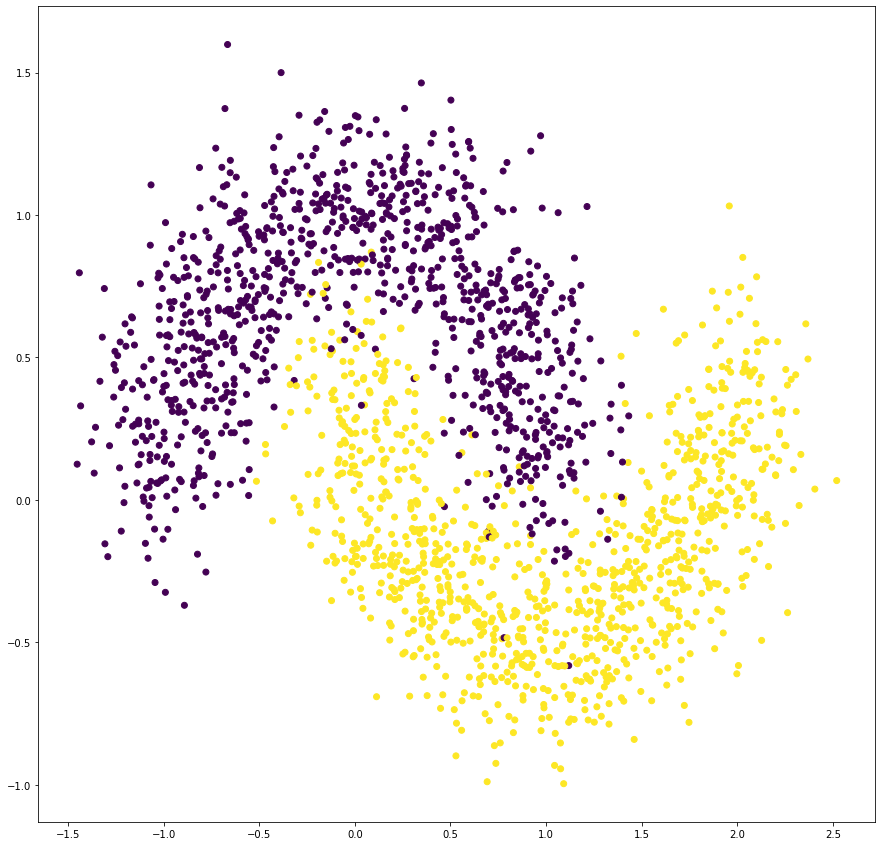

In [4]:
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
X.shape

(2000, 2)

In [6]:
y.shape

(2000,)

In [7]:
def initiate(hidden_1=10, hidden_2=10, output=1):
    
    W1 = np.random.randn(hidden_1, X.shape[1]) 
    W2 = np.random.randn(hidden_2, hidden_1) 
    W3 = np.random.randn(output, hidden_2) 
    b1 = np.random.randn(hidden_1, 1) 
    b2 = np.random.randn(hidden_2, 1) 
    b3 = np.random.randn(output, 1)
    
    return W1, W2, W3, b1, b2, b3

In [8]:
sigma = lambda x: 1/(1 + np.exp(-x))
dsigma = lambda x: sigma(x)*(1-sigma(x))

In [9]:
def feed_forward(W1, W2, W3, b1, b2, b3, x):
    a1 = W1@x + b1
    z1 = sigma(a1)
    a2 = W2@z1 + b2
    z2 = sigma(a2)
    a3 = W3@z2 + b3
    z3 = sigma(a3)
    
    return a1, a2, a3, z1, z2, z3

In [10]:
def d_W3(a1, a2, a3, z1, z2, z3, X, y) :
    d = (2 * (z3 - y))
    d = d * dsigma(z3)
    d = d @ z2.T 
    return d

def d_W2(a1, a2, a3, z1, z2, z3, X, y):
    d = (2 * (z3 - y))
    d = d * dsigma(z3)
    d = (d.T@W3).T
    d = d * dsigma(z2)
    d = d @ z1.T
    return d

def d_W1(a1, a2, a3, z1, z2, z3, X, y):
    d = (2 * (z3 - y))
    d = d * dsigma(z3)
    d = (d.T@W3).T
    d = d * dsigma(z2)
    d = (d.T@W2).T
    d = d * dsigma(z1)
    d = d @ X.T
    return d

def d_b3 (a1, a2, a3, z1, z2, z3, X, y) :
    d = (2 * (z3 - y))
    d = d * dsigma(z3)
    d = d*1 
    return d

def d_b2 (a1, a2, a3, z1, z2, z3, X, y) :
    d = (2 * (z3 - y))
    d = d * dsigma(z3)
    d = (d.T@W3).T
    d = d * dsigma(z2)
    d = d*1
    return d

def d_b1 (a1, a2, a3, z1, z2, z3, X, y) :
    d = (2 * (z3 - y)) 
    d = d * dsigma(z3)
    d = (d.T@W3).T
    d = d * dsigma(z2)
    d = (d.T@W2).T
    d = d * dsigma(z1)
    d = d*1
    return d

In [11]:
def update(W1, W2, W3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, lr=0.0001):
    W1 = W1 - lr*dw1
    W2 = W2 - lr*dw2
    W3 = W3 - lr*dw3
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2
    b3 = b3 - lr*db3
    
    return W1, W2, W3, b1, b2, b3

In [12]:
epoch = 1000
W1, W2, W3, b1, b2, b3 = initiate()

In [13]:
_, _, _, _, _, target_before = feed_forward(W1, W2, W3, b1, b2, b3, X.T)

In [14]:
for i in range(epoch):
    loss = []
    for index, x in enumerate(X):
        x = np.reshape(x, (X.shape[1],1))
        a1, a2, a3, z1, z2, z3 = feed_forward(W1, W2, W3, b1, b2, b3, x)
        loss.append(np.square(z3 - y[index]))
        dw1 = d_W1(a1, a2, a3, z1, z2, z3, x, y[index])
        dw2 = d_W2(a1, a2, a3, z1, z2, z3, x, y[index])
        dw3 = d_W3(a1, a2, a3, z1, z2, z3, x, y[index])
        db1 = d_b1(a1, a2, a3, z1, z2, z3, x, y[index])
        db2 = d_b2(a1, a2, a3, z1, z2, z3, x, y[index])
        db3 = d_b3(a1, a2, a3, z1, z2, z3, x, y[index])
        W1, W2, W3, b1, b2, b3 = update(W1, W2, W3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, lr=0.001)
        
    print(f'Total loss in {i} step is:{(np.sum(loss)/len(loss))}')      

Total loss in 0 step is:0.4721881629538458
Total loss in 1 step is:0.3627389258011859
Total loss in 2 step is:0.2620998564707609
Total loss in 3 step is:0.23975814930184636
Total loss in 4 step is:0.23211811703467997
Total loss in 5 step is:0.22579059639168958
Total loss in 6 step is:0.21977375166477248
Total loss in 7 step is:0.21397224030994882
Total loss in 8 step is:0.2083611197793153
Total loss in 9 step is:0.20292869551094422
Total loss in 10 step is:0.19767037735446738
Total loss in 11 step is:0.1925867343392361
Total loss in 12 step is:0.18768205799103874
Total loss in 13 step is:0.1829630520715233
Total loss in 14 step is:0.1784376215175308
Total loss in 15 step is:0.17411378589188875
Total loss in 16 step is:0.16999875092979125
Total loss in 17 step is:0.16609816805670216
Total loss in 18 step is:0.16241560140097824
Total loss in 19 step is:0.15895220749178104
Total loss in 20 step is:0.15570661734084132
Total loss in 21 step is:0.1526749966878283
Total loss in 22 step is:0.1

Total loss in 182 step is:0.0949950296797649
Total loss in 183 step is:0.09497699873178979
Total loss in 184 step is:0.09495913649913908
Total loss in 185 step is:0.09494143521367644
Total loss in 186 step is:0.09492388744800377
Total loss in 187 step is:0.09490648610131536
Total loss in 188 step is:0.09488922438581505
Total loss in 189 step is:0.09487209581367675
Total loss in 190 step is:0.09485509418452664
Total loss in 191 step is:0.09483821357342961
Total loss in 192 step is:0.09482144831935863
Total loss in 193 step is:0.09480479301413071
Total loss in 194 step is:0.09478824249179024
Total loss in 195 step is:0.09477179181842356
Total loss in 196 step is:0.0947554362823877
Total loss in 197 step is:0.09473917138493627
Total loss in 198 step is:0.09472299283122902
Total loss in 199 step is:0.09470689652170833
Total loss in 200 step is:0.0946908785438289
Total loss in 201 step is:0.09467493516412621
Total loss in 202 step is:0.09465906282061103
Total loss in 203 step is:0.094643258

Total loss in 361 step is:0.09236789328376031
Total loss in 362 step is:0.09235424439696903
Total loss in 363 step is:0.0923406063151894
Total loss in 364 step is:0.09232697906697653
Total loss in 365 step is:0.09231336268034332
Total loss in 366 step is:0.09229975718277121
Total loss in 367 step is:0.09228616260122077
Total loss in 368 step is:0.09227257896214251
Total loss in 369 step is:0.09225900629148773
Total loss in 370 step is:0.09224544461471909
Total loss in 371 step is:0.09223189395682133
Total loss in 372 step is:0.09221835434231199
Total loss in 373 step is:0.092204825795252
Total loss in 374 step is:0.09219130833925622
Total loss in 375 step is:0.09217780199750406
Total loss in 376 step is:0.0921643067927497
Total loss in 377 step is:0.09215082274733283
Total loss in 378 step is:0.09213734988318842
Total loss in 379 step is:0.09212388822185741
Total loss in 380 step is:0.09211043778449664
Total loss in 381 step is:0.09209699859188879
Total loss in 382 step is:0.0920835706

Total loss in 540 step is:0.09011273003927245
Total loss in 541 step is:0.09010125659120546
Total loss in 542 step is:0.09008979615227565
Total loss in 543 step is:0.09007834872574647
Total loss in 544 step is:0.09006691431469528
Total loss in 545 step is:0.09005549292201145
Total loss in 546 step is:0.09004408455039434
Total loss in 547 step is:0.0900326892023518
Total loss in 548 step is:0.09002130688019816
Total loss in 549 step is:0.09000993758605273
Total loss in 550 step is:0.089998581321838
Total loss in 551 step is:0.08998723808927797
Total loss in 552 step is:0.08997590788989669
Total loss in 553 step is:0.08996459072501654
Total loss in 554 step is:0.08995328659575684
Total loss in 555 step is:0.08994199550303231
Total loss in 556 step is:0.08993071744755156
Total loss in 557 step is:0.08991945242981586
Total loss in 558 step is:0.08990820045011759
Total loss in 559 step is:0.08989696150853904
Total loss in 560 step is:0.08988573560495111
Total loss in 561 step is:0.089874522

Total loss in 719 step is:0.0882607262241823
Total loss in 720 step is:0.08825144446127003
Total loss in 721 step is:0.08824217336727952
Total loss in 722 step is:0.08823291292209397
Total loss in 723 step is:0.08822366310569076
Total loss in 724 step is:0.08821442389814443
Total loss in 725 step is:0.08820519527962975
Total loss in 726 step is:0.08819597723042485
Total loss in 727 step is:0.08818676973091397
Total loss in 728 step is:0.08817757276159072
Total loss in 729 step is:0.08816838630306083
Total loss in 730 step is:0.08815921033604522
Total loss in 731 step is:0.08815004484138302
Total loss in 732 step is:0.08814088980003426
Total loss in 733 step is:0.0881317451930828
Total loss in 734 step is:0.08812261100173942
Total loss in 735 step is:0.08811348720734438
Total loss in 736 step is:0.08810437379137047
Total loss in 737 step is:0.08809527073542571
Total loss in 738 step is:0.08808617802125598
Total loss in 739 step is:0.08807709563074818
Total loss in 740 step is:0.08806802

Total loss in 898 step is:0.08675761707800705
Total loss in 899 step is:0.08675010204414393
Total loss in 900 step is:0.08674259734201133
Total loss in 901 step is:0.08673510299089
Total loss in 902 step is:0.08672761901024738
Total loss in 903 step is:0.08672014541973555
Total loss in 904 step is:0.08671268223918932
Total loss in 905 step is:0.08670522948862454
Total loss in 906 step is:0.08669778718823606
Total loss in 907 step is:0.08669035535839587
Total loss in 908 step is:0.08668293401965092
Total loss in 909 step is:0.08667552319272179
Total loss in 910 step is:0.08666812289849986
Total loss in 911 step is:0.0866607331580461
Total loss in 912 step is:0.08665335399258878
Total loss in 913 step is:0.08664598542352135
Total loss in 914 step is:0.08663862747240071
Total loss in 915 step is:0.08663128016094504
Total loss in 916 step is:0.08662394351103171
Total loss in 917 step is:0.08661661754469535
Total loss in 918 step is:0.0866093022841258
Total loss in 919 step is:0.08660199775

In [15]:
_, _, _, _, _, target_after = feed_forward(W1, W2, W3, b1, b2, b3, X.T)

In [16]:
target_before = target_before.T.reshape(X.shape[0],)

In [17]:
target_after = target_after.T.reshape(X.shape[0],)

In [18]:
data = {'true':y, 'target_before':target_before, 'target_after':target_after}

In [19]:
df = pd.DataFrame(data)

In [20]:
def mapping(x):
    if x>0.5:
        return 1
    else:
        return 0

In [21]:
df['label_before'] = df['target_before'].apply(mapping)
df['label_after'] = df['target_after'].apply(mapping)

In [22]:
df

,true,target_before,target_after,label_before,label_after
0,1,0.993074,0.694980,1,1
1,0,0.993413,0.069879,1,0
2,1,0.993152,0.957477,1,1
3,0,0.990305,0.181204,1,0
4,1,0.993100,0.969461,1,1
5,1,0.992938,0.953986,1,1
6,0,0.991681,0.051824,1,0
7,1,0.993023,0.974701,1,1
8,0,0.993345,0.226516,1,0
9,1,0.993157,0.958280,1,1


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [24]:
print(confusion_matrix(df['true'], df['label_before']))

[[   0 1000]
 [   0 1000]]


In [25]:
print(confusion_matrix(df['true'], df['label_after']))

[[898 102]
 [130 870]]


In [26]:
print(classification_report(df['true'], df['label_after']))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1000
           1       0.90      0.87      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [27]:
print(accuracy_score(df['true'], df['label_before']))

0.5


In [28]:
print(accuracy_score(df['true'], df['label_after']))

0.884
